# Introduction to Machine Learning: Linear Regression Model


To warm your appetite for Machine Learning, in this lecture you will experiment with your first Machine Learning model: 

- Linear Regression Model

To do this, you will also experiment with the basic Machine Learning pipeline. The steps include:
- Loading the data
- Data preparation 
- Data Visualization 
- Training a linear model 
- Using the trained model to make a prediction

To perform these steps we will use Pandas and Scikit-Learn library. We assume you have completed the python and pandas tutorial of the last session. 
If not, do not worry. We will also guide you through every function that you will be using in the following exercise.



## Scikit-Learn

<a href="https://scikit-learn.org/stable/ ">Scikit-Learn</a> is a famous Machine Learning library in Python. It contains simple and efficient tools for data mining and data analysis. It is built on NumPy, SciPy, and matplotlib libraries. 


## Pandas
Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

Pandas DataFrames make manipulating your data easy, from selecting or replacing columns and indices to reshaping your data. You won't have to write functions yourself to read and write data as we did in the first lecture.

The best intro guide, but it's big, is 10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html.
Check the website on the library here : https://pandas.pydata.org. You can also find documentation in this website.

This is also a good <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=229765585183&utm_targetid=dsa-473406573835&utm_loc_interest_ms=&utm_loc_physical_ms=9056017&gclid=Cj0KCQjwh8jrBRDQARIsAH7BsXcYZ9E60iAAQ9t8VhRS_TyfOtaM571VNV8EGKby9wgj9An4b1SZepgaAioSEALw_wcB"> tutorial on Pandas </a>
    

Let's start to work with pandas, to make analysis of this data easier.  Our convention is to import pandas as "pd". We also import other useful libraries such as numpy for numerical calculation, matplotlib and seaborn for data visualization.




In [2]:
import pandas as pd

# numpy is a library very useful in Python for numerical stuff
import numpy as np

# two librairies for plotting and visualization
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

 ## Loading the data
For this exercise you will be using data saved in a csv file. To load such data, the pandas function `read_csv()` can be used.

In [3]:
# Pandas has built-in tools to read files, including csv and excel.
complaints = pd.read_csv('data/311-service-requests.csv')


/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_25069/2686469100.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('data/311-service-requests.csv')


In [4]:
# Pandas has built-in tools to read files, including csv and excel.
complaints = pd.read_csv('data/311-service-requests.csv', low_memory=False)


You can also specify some parameters for `read_csv()`. For example, to read the file `bikes.csv`, you need to specify the following parameters:

- sep: specify the separators of the columns. For example ',', ';', '\t'
- encoding: specify the encoding of the file. This can be 'iso-8859-1', 'latin1', cp1252, etc.
- parse_dates: specify the column name that contains dates, if any.
- dayfirst: True/False. Specify if the column containing dates has the day at first.

In [5]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, low_memory=False)

`head()` shows the first rows of a dataframe.

In [6]:
complaints.head(3)  

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


`tail()` shows the last rows of a dataframe.

In [7]:
complaints.tail(3)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


## Preparing the data
Preparing the data consists of applying some functions in order to make the data you are dealing with in a format suitable for training. 
After checking the data you have, you need to clean it. Cleaning the data consists of applying operations like deleting, transforming, renaming or pivoting columns or rows. 

In the following you will learn a few pandas functions that will allow you to perform the data preparation of the exercise below. 

### Copy data
`copied_data = data.copy()`



### Data selection


#### Get a specific column

**Selection by colomn name**

In [8]:
complaints["Agency"]

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

In [9]:
complaints.Agency

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

**If you want to select certain rows**

All rows

In [10]:
complaints.loc[:,'Agency']

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

Some rows

In [11]:
complaints.loc[1:3,'Agency']

1    NYPD
2    NYPD
3    NYPD
Name: Agency, dtype: object

**Selection by position**

In [12]:
# comment/uncomment lines
complaints.iloc[:,3]

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

#### Get a line

In [13]:
# comment/uncomment lines
complaints.iloc[1,:]


Unique Key                                                        26593698
Created Date                                        10/31/2013 02:01:04 AM
Closed Date                                                            NaN
Agency                                                                NYPD
Agency Name                                New York City Police Department
Complaint Type                                             Illegal Parking
Descriptor                                    Commercial Overnight Parking
Location Type                                              Street/Sidewalk
Incident Zip                                                         11378
Incident Address                                                 58 AVENUE
Street Name                                                      58 AVENUE
Cross Street 1                                                    58 PLACE
Cross Street 2                                                   59 STREET
Intersection Street 1    

#### Select multiple rows and columns
Sometimes you want to combine your selection to rows and columns.  You can do that with `.loc[]` and `.iloc[]`.

`iloc[rows,colums]` is for use with **number selectors** for row and column, and `loc[rows,columns]` is for **label selectors** for row and column (if they exist).

The documentation for this is [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

If you use these, you must put a row selector first, then a column selector:

In [14]:
#Selecting by integer is done with iloc:
# this selects the first 10 rows and the first 3 columns.
complaints.iloc[0:10, 0:3]

,Unique Key,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN
1,26593698,10/31/2013 02:01:04 AM,NaN
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM
4,26590930,10/31/2013 01:53:44 AM,NaN
5,26592370,10/31/2013 01:46:52 AM,NaN
6,26595682,10/31/2013 01:46:40 AM,NaN
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM


select rows 0:5, but the columns between the named columns here: <br>
Note, this works with row numbers because there is no label for the rows aside from numbers. <br>
**Notice this command loc is "inclusive" of the end points on the range.  Meaning it includes them.**

In [15]:
complaints.loc[0:5, 'Closed Date':'Complaint Type']

,Closed Date,Agency,Agency Name,Complaint Type
0,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk
1,NaN,NYPD,New York City Police Department,Illegal Parking
2,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial
3,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle
4,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent
5,NaN,NYPD,New York City Police Department,Noise - Commercial


What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want, using double square brackets (Or using the `loc[]` method above):

In [16]:
#complaints[['Complaint Type', 'Borough']]
complaints.loc[:,['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


### Data Pivoting

The pivot function is used to create a new derived table out of a given one. 

`pd.pivot(data, index=['Row_index_name1','Row_index_name2,..'], columns=['Column_index_name', ...],values=['Columns_values']`)

![Pivot](img/pivot.png)

Before calling pivot we need to ensure that our data does not have rows with duplicate values for the specified columns. If we can’t ensure this we may have to use the pivot_table method instead.


In [17]:
help(pd.pivot)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', *, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, values: 'IndexLabel | None' = None) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    data : DataFrame
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
           Also accept list of index names.
    
    columns : str or object or a list of str
        Column to use to make new 

### Column renaming
 
- `.replace("string1", "string2")` : rename a string or replace a string by another
- `data.rename(index={}, columns={})` : rename rows (index) and columns in a dataframe

You can specify the old and new names like this :`{name_old1:name_new1, name_old2:name_new1, ...}`.

You can also apply functions to rows and index names like this: `index=function` or `column=function`or `data.rename(str.function, axis='')`. 

Check out the following examples.



In [18]:
import pandas as pd
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [19]:
df.rename(index={0: "x", 1: "y", 2: "z"})

,A,B
x,1,4
y,2,5
z,3,6


In [20]:
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [21]:
df.rename(index=str)

,A,B
0,1,4
1,2,5
2,3,6


In [22]:
df.rename(str.lower, axis='columns')

,a,b
0,1,4
1,2,5
2,3,6


In [23]:
df.rename({1: 2, 2: 4}, axis='index')

,A,B
0,1,4
2,2,5
4,3,6


### Setting an index
The default index in python is numbers that  start from 0. However, it is possible to set a certain column as the index:

`data.set_index("column_name", inplace=True)`

For example, if you have a column containing the dates of your data, you can set the date as index.


### Merging tables

<img src="img/sql_joins.jpg" hight="70" width="70%">.

`A.merge(B, how=' ', on=None, left_on='column_name', right_on='column_name', left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)`

- `how can be "left" or "right" or "inner" (Default). 

For more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Another alternative is join.  If two dataframe have the same index, it will merge along the index and just add the columns.



In [24]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],'value': [1, 2, 3, 5]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [25]:
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],'value': [5, 6, 7, 8]})
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


Merge df1 and df2 on the lkey and rkey columns. The value columns have the default suffixes, _x and _y, appended.

In [26]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [27]:
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


Merge DataFrames df1 and df2 with specified left and right suffixes appended to any overlapping columns.



In [28]:
df1.merge(df2, left_on='lkey', right_on='rkey',
          suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


### Sorting values
To sort the values of the columns with respect to a certain column: `sort_values(by = '', ascending= )`

`data.reset_index(inplace=True, drop = True)`


### Creating the training dataset

`X = np.c_[data["column_name"]] `

`y = np.c_[data["column_name"]] `


## Data Visualisation
`data.plot(kind='scatter', x="column_name", y='column_name') `

`plt.show() `



## Training and running a model using Scikit-Learn

- Import the model from Scikit-Learn.

`import sklearn.model_name`

for linear model: `.linear_model`

- Select the specific model you want to use from the set of models
 
`model = sklearn.model_name.SpecificModelName()`

for linear regression model

`model = sklearn.linear_model.LinearRegression()`

- Train the model

`model.fit(X, y)`

- Predict on a new instance

`model.predict(X_new)`








### Example : the Adverstising Dataset

In [32]:
data_path = r"/Users/fulin/Documents/GitHub/EM-Lyon/Python Booster 01/Week3_Intro_ML/Session 04/data"

In [33]:
import os
file = os.path.join(data_path,"Advertising.csv")

In [34]:
import pandas as pd
ad_df = pd.read_csv(file)

In [35]:
display(ad_df)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [36]:
X = ad_df.drop(columns = ["sales"])
y = ad_df["sales"]

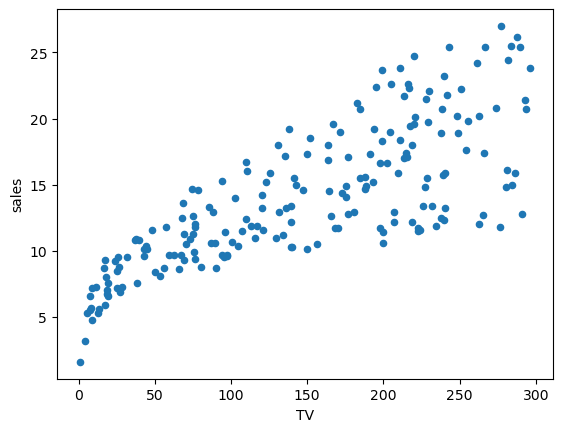

In [37]:
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

ad_df.plot(kind='scatter', x="TV", y='sales')
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression()

In [40]:
pred = model.predict(X)

In [41]:
# How good is prediction of client with index #5
print(f"actual: {y[4]},\npredicted: {pred[4]}")

actual: 12.9,
predicted: 13.240524594858073


# In-Class Exercises

 

**Does money make people happy?? Lets figure this out!**

First we download the Better Life Index data from the <a href="https://stats.oecd.org/index.aspx?DataSetCode=BLI">OECD’s website</a>  as well as stats about GDP per capita from the  <a href="https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512,668,914,672,612,946,614,137,311,962,213,674,911,676,193,548,122,556,912,678,313,181,419,867,513,682,316,684,913,273,124,868,339,921,638,948,514,943,218,686,963,688,616,518,223,728,516,558,918,138,748,196,618,278,624,692,522,694,622,142,156,449,626,564,628,565,228,283,924,853,233,288,632,293,636,566,634,964,238,182,662,453,960,968,423,922,935,714,128,862,611,135,321,716,243,456,248,722,469,942,253,718,642,724,643,576,939,936,644,961,819,813,172,199,132,733,646,184,648,524,915,361,134,362,652,364,174,732,328,366,258,734,656,144,654,146,336,463,263,528,268,923,532,738,944,578,176,537,534,742,536,866,429,369,433,744,178,186,436,925,136,869,343,746,158,926,439,466,916,112,664,111,826,298,542,927,967,846,443,299,917,582,544,474,941,754,446,698,666&s=NGDPDPC&grp=0&a"> IMF’s website</a>. 

**OECD Better Life Index** is a first attempt to bring together internationally comparable measures of well-being in line with the recommendations of the Commission on the Measurement of Economic Performance and Social Progress also known as the Stiglitz-Sen-Fitoussi Commission. The recommendations made by this Commission sought to address concerns that standard macroeconomic statistics like GDP failed to give a true account of people’s current and future well-being.

Here is a summary of the OECD Better Life Index data:
- Country
- Indicator : A set of happiness indicators
- INEQUALITY : All population, Women or Men 
- Value : Better Life Index value
- etc..

**GDP per capita** is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population. That makes it a good measurement of a country's standard of living. It tells you how prosperous a country feels to each of its citizens.

Summary of GDP per capita data:
- 
The files are in the data folder on BrightSpace. Then we join the tables and sort by GDP per capita.
Lets get to action!


## Load the necessary libraries

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

**To make this notebook's output stable across runs**

In [43]:
np.random.seed(42)

## Load the data `oecd_bli_2015.csv` and `gdp_per_capita.csv`. 

Be careful about the arguments you specify

**Nb. Decimal and Thousands Separators**

Great Britain and the United States are two of the few places in the world that use a period to indicate the decimal place. Many other countries use a comma instead. The decimal separator is also called the radix character. Likewise, while the U.K. and U.S. use a comma to separate groups of thousands, many other countries use a period instead, and some countries separate thousands groups with a thin space.

In [44]:
# YOUR CODE HERE
oecd_bli = pd.read_csv('./data/lifesat/oecd_bli_2015.csv', sep=',', header=0)

In [45]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [51]:
# YOUR CODE HERE
gdp_per_capita = pd.read_csv('./data/lifesat/gdp_per_capita.csv', sep='\t', header=0, encoding='latin1')

In [52]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


## Prepare the data : Merge the OECD's life satisfaction data and the IMF's GDP per capita data. 

### Select the data rows having `"INEQUALITY"` equals to `"TOT"`
The data contains data for women, men and the total population. We don't need to study women alone or men alone and so we discard all the data and keep data concerning the whole population.

In [53]:
# YOUR CODE HERE
oecd_bli.loc[oecd_bli['INEQUALITY'] == 'TOT']

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN


In [ ]:
oecd_bli_copy = # YOUR CODE HERE

In [ ]:
oecd_bli_copy.head(3)

In [ ]:
oecd_bli_copy.shape

### Pivot the table such that the new dataframe display the countries as dndex, each  indicator of well-being becomes a column, and the overall score of wellbeing the data values.

At the end, we want a dataframe where each country represents only one row.

In [ ]:
# YOUR CODE HERE
oecd_bli_copy = 

In [ ]:
oecd_bli_copy.head()

### Rename the column "2015" : "GDP per capita" in the gdp per capita dataframe
If you look at the gdp per capita dataframe, you notice that there is a column called 2015 which represents the value of gdp per capita of each country. For better clarity, it is better to rename it to a clearer name. This is part of data preparation.

In [ ]:
# YOUR CODE HERE

In [ ]:
gdp_per_capita_copy

### Prepare the gdp per capita dataframe such that we can merge it with the oecd_bli_copy on the country key

In [ ]:
# YOUR CODE HERE

In [ ]:
gdp_per_capita_copy

### Merge the two dataframes 
Now, after we have done some simple preparation, we should merge the two data frames. We do this merging because we want that all the data that interests us for our study to be in the same place. This will make it easier for you to process the data and study it. But it is a choice.

In [ ]:
# YOUR CODE HERE
full_country_stats = 

In [ ]:
full_country_stats

### Sort the Dataframe according to the values of GDP per capita 
We sort the values, because this will make our data more organized. It will also help us see better into the ddata.

In [ ]:
# YOUR CODE HERE

In [ ]:
full_country_stats

### Remove all columns and keep only columns "GDP per capita" and "Life satisfaction"

In [ ]:
# YOUR CODE HERE

### Plot the data to see if there is a trend


In [ ]:
# YOUR CODE HERE

From the plot above, you can see that there is a trend in the data, however, there exists some outliers. You can choose some points from the plot and remove them. If we remove them we mind get a better model. 

### Compute the outliers then remove them

Alternatively, remove the following observations : rows number 0, 1, 6, 8, 33, 34, 35

In [ ]:
# YOUR CODE HERE

### Put all the above in a function `prepare_country_stats` to make data preparation step compact 

In [ ]:
# YOUR CODE HERE

## Prepare the data - Short version
### Apply the `prepare_country_stats` function to both dataframes

In [ ]:
# YOUR CODE HERE

### We want to predict Life Satisfaction from GDP per Capita. 
Set the training data (define the features and target)

In [ ]:
# YOUR CODE HERE

## Visualize the data
### Plot the scatter plot of `GDP per capita` and `Life satisfaction`

In [ ]:
# YOUR CODE HERE

## Train a linear regression model


In [ ]:
# YOUR CODE HERE

## Make a prediction for Cyprus
To make a prediction on Cyprus (X_new). Open the GDP per capita file and search for the country's gdp per capita. Then apply the prediction model on it.


In [ ]:
# Cyprus' GDP per capita


In [ ]:
# YOUR CODE HERE

## Replace the linear regression model with k-neighbors regression model:

In [ ]:
# YOUR CODE HERE

In [ ]:
# Train the model
# YOUR CODE HERE

In [ ]:
# Make a prediction for Cyprus
# YOUR CODE HERE

## Compute the performance of your model and give elements of interpretability (size effect)

## Improve the model by including all relevant features then provide elements of performance and intepretability
- Which models are the best ?
- Which features are the best & most relevant predictors ?